# K Mean Clustering

Objective: Creditcard usage clustering  
Dataset: creditcard.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('creditcard.csv')
print(data.shape)
data.head()

(8949, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C17140,795.497557,0.909091,0.0,0.0,0.0,5676.779668,0.000000,0.000000,0.0,0.500000,6,0,50.0,7570.207782,410.260506,0.444444,12
1,C16744,45.226140,0.727273,0.0,0.0,0.0,146.123548,0.000000,0.000000,0.0,0.083333,1,0,150.0,298.102350,127.897927,0.000000,12
2,C12567,112.010460,1.000000,229.0,229.0,0.0,0.000000,0.181818,0.181818,0.0,0.000000,0,4,150.0,119.626820,252.515849,0.000000,11
3,C16725,151.704474,1.000000,0.0,0.0,0.0,87.794993,0.000000,0.000000,0.0,0.166667,2,0,150.0,316.324154,277.040895,0.000000,12
4,C15662,70.794108,0.909091,0.0,0.0,0.0,211.854586,0.000000,0.000000,0.0,0.181818,2,0,150.0,699.292482,599.549300,0.000000,11


## Check Null Value

In [2]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data Exploration

12    7584
11     365
10     236
6      203
8      196
7      190
9      175
Name: TENURE, dtype: int64


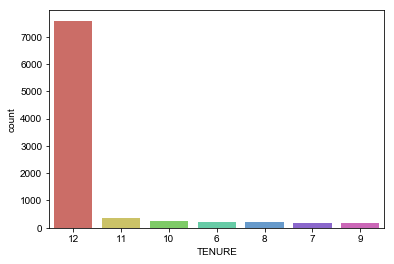

In [3]:
print(data['TENURE'].value_counts())

sns.countplot(x='TENURE',data = data, palette='hls',order = data['TENURE'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Drop Column

In [4]:
data.drop(['CUST_ID'],axis=1,inplace=True)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,795.497557,0.909091,0.0,0.0,0.0,5676.779668,0.000000,0.000000,0.0,0.500000,6,0,50.0,7570.207782,410.260506,0.444444,12
1,45.226140,0.727273,0.0,0.0,0.0,146.123548,0.000000,0.000000,0.0,0.083333,1,0,150.0,298.102350,127.897927,0.000000,12
2,112.010460,1.000000,229.0,229.0,0.0,0.000000,0.181818,0.181818,0.0,0.000000,0,4,150.0,119.626820,252.515849,0.000000,11
3,151.704474,1.000000,0.0,0.0,0.0,87.794993,0.000000,0.000000,0.0,0.166667,2,0,150.0,316.324154,277.040895,0.000000,12
4,70.794108,0.909091,0.0,0.0,0.0,211.854586,0.000000,0.000000,0.0,0.181818,2,0,150.0,699.292482,599.549300,0.000000,11


In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,834.075035,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2336.104378,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,163.029483,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,289.686899,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## Correlation

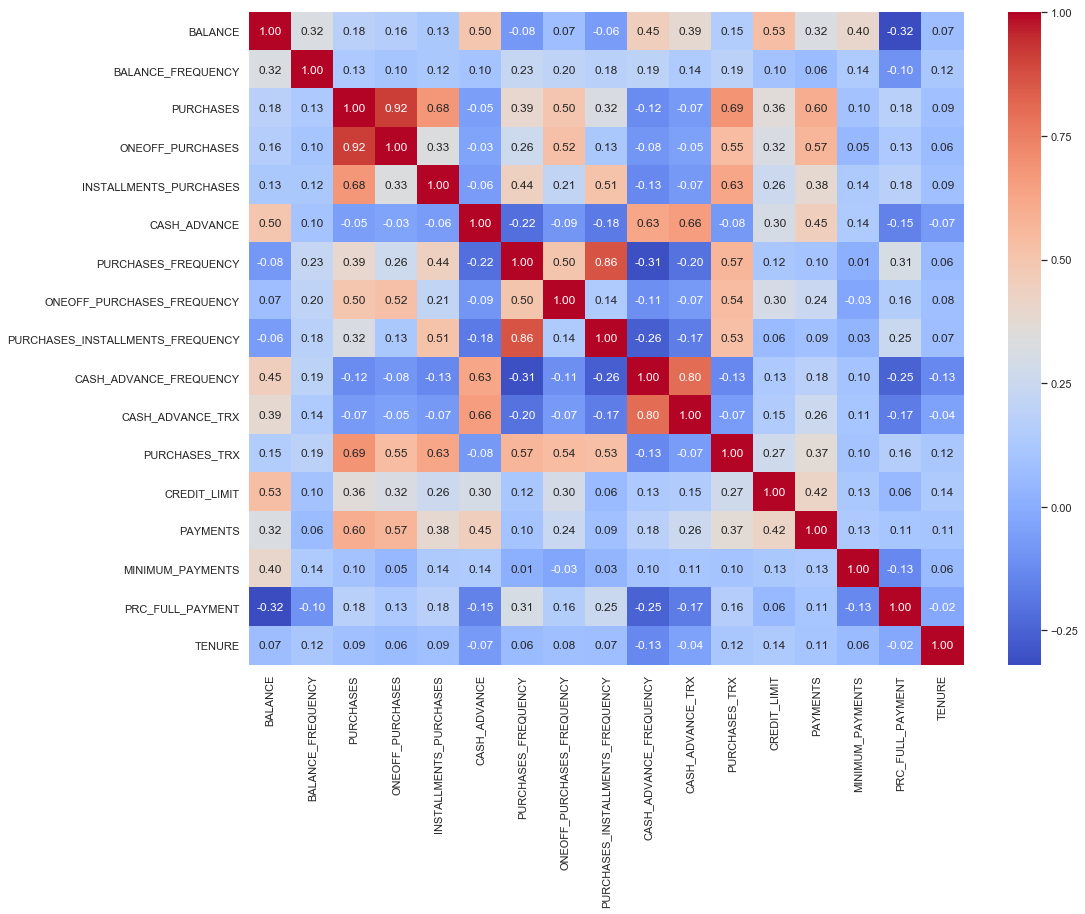

In [6]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Data Standardization

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)
print('Dataset', X.shape)
X[0:2]

Dataset (8949, 17)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.04177345, 0.909091  , 0.        , 0.        , 0.        ,
        0.12043096, 0.        , 0.        , 0.        , 0.33333333,
        0.04878049, 0.        , 0.        , 0.14925052, 0.00536947,
        0.444444  , 1.        ],
       [0.00237493, 0.727273  , 0.        , 0.        , 0.        ,
        0.00309996, 0.        , 0.        , 0.        , 0.05555533,
        0.00813008, 0.        , 0.0033389 , 0.00587724, 0.00167392,
        0.        , 1.        ]])

## Find the Best K

In [8]:
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[5933.635214833585, 3506.868080934568, 2926.3185390895637, 2550.6770767079856, 2261.806678274802, 2052.136506043221, 1857.475312841074, 1700.5460020575483, 1568.8261547653403, 1448.231532914418, 1349.5524211896077, 1282.4727266106847, 1225.2511426817007, 1168.679641836602]


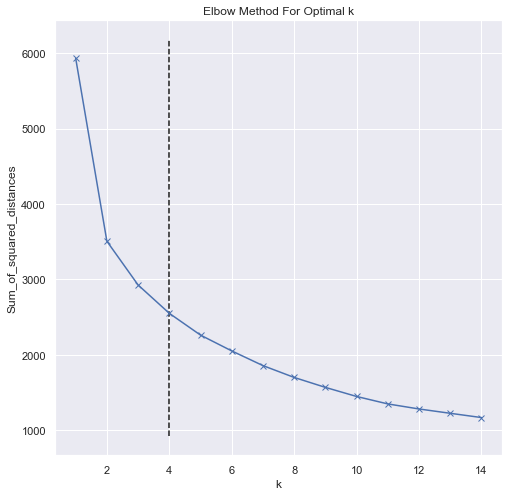

The best k: 4


In [9]:
y = Sum_of_squared_distances
x = range(1, len(y)+1)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print('The best k:', kn.knee)

## K Mean Clustering Modelling

In [10]:
clusterNum = kn.knee
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print('No. of cluster', labels.shape)
labels[0:10]

No. of cluster (8949,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 3])

## Assign Labels Cluster to Dataframe

In [11]:
data["KM_Cluster"] = labels
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KM_Cluster
0,795.497557,0.909091,0.0,0.0,0.0,5676.779668,0.000000,0.000000,0.0,0.500000,6,0,50.0,7570.207782,410.260506,0.444444,12,1
1,45.226140,0.727273,0.0,0.0,0.0,146.123548,0.000000,0.000000,0.0,0.083333,1,0,150.0,298.102350,127.897927,0.000000,12,1
2,112.010460,1.000000,229.0,229.0,0.0,0.000000,0.181818,0.181818,0.0,0.000000,0,4,150.0,119.626820,252.515849,0.000000,11,1
3,151.704474,1.000000,0.0,0.0,0.0,87.794993,0.000000,0.000000,0.0,0.166667,2,0,150.0,316.324154,277.040895,0.000000,12,1
4,70.794108,0.909091,0.0,0.0,0.0,211.854586,0.000000,0.000000,0.0,0.181818,2,0,150.0,699.292482,599.549300,0.000000,11,1


## Cluster 2D Visualization

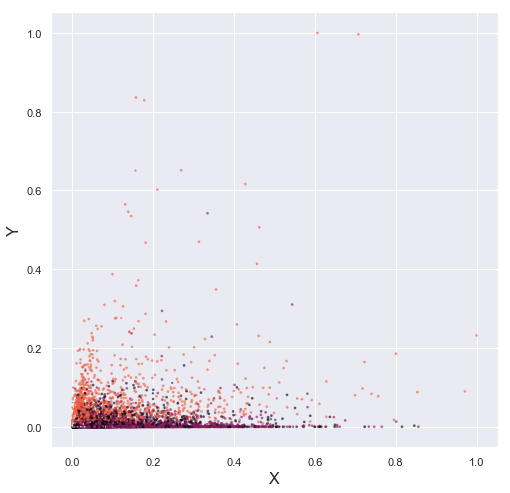

In [12]:
data.groupby('KM_Cluster').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

## Cluster 3D Visualization

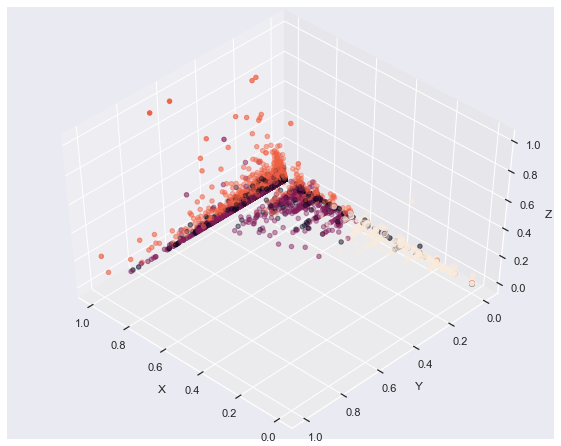

In [13]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## List and View Cluster

1    3650
0    2687
2    1402
3    1210
Name: KM_Cluster, dtype: int64


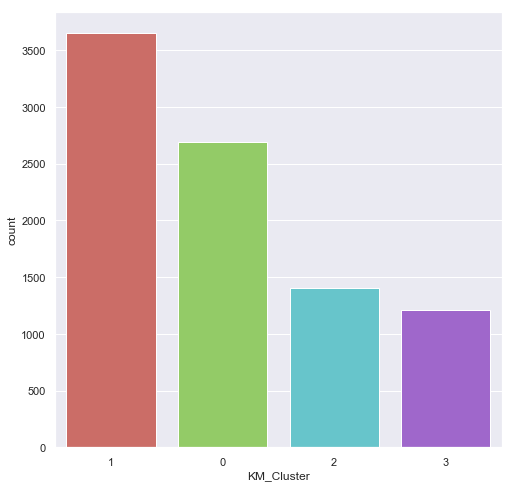

In [14]:
print(data['KM_Cluster'].value_counts())

sns.countplot(x='KM_Cluster',data = data, palette='hls',order = data['KM_Cluster'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [15]:
data[data['KM_Cluster']== 0].head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KM_Cluster
25,207.099447,1.000000,1764.00,0.00,1764.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,400.0,1667.797657,2090.378842,0.545455,12,0
30,288.097302,1.000000,2622.60,0.00,2622.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,450.0,2718.479540,2413.233231,0.833333,12,0
31,252.359096,1.000000,2487.00,0.00,2487.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,450.0,2347.418943,2621.829478,0.166667,12,0
48,28.853384,0.625000,251.55,60.00,191.55,0.000000,0.625000,0.125000,0.500000,0.000000,0,8,500.0,147.577454,89.979729,0.666667,8,0
52,42.204276,0.909091,655.73,197.39,458.34,0.000000,1.000000,0.083333,0.916667,0.000000,0,12,500.0,459.163878,96.554895,0.500000,12,0
77,341.982418,0.800000,573.20,228.10,345.10,191.180571,0.600000,0.200000,0.400000,0.200000,2,10,500.0,500.641105,136.443554,0.000000,10,0
127,232.140345,0.818182,552.66,76.00,476.66,76.633316,1.000000,0.166667,1.000000,0.083333,2,20,500.0,1123.972876,332.553992,0.090909,12,0
130,383.881717,1.000000,274.01,0.00,274.01,877.521511,0.916667,0.000000,0.833333,0.166667,3,22,500.0,1214.797263,359.953614,0.250000,12,0
131,402.814647,1.000000,960.09,91.80,868.29,373.408367,1.000000,0.083333,1.000000,0.083333,5,59,500.0,1127.286670,366.395498,0.083333,12,0
133,459.134859,1.000000,223.34,0.00,223.34,0.000000,0.666667,0.000000,0.666667,0.000000,0,9,500.0,498.401939,455.872675,0.000000,12,0
